### Newton's Method
#### Author: Alina Ozhegova 

Date: 07/06/2019 (Week 1)




In [232]:
import numpy as np
import sympy as sy
from scipy import optimize as opt
from matplotlib import pyplot as plt 

### Problem 1

In [36]:
def Newton(f, x0, f_prime, tol = 1e-5, maxiters = 15):
    xk = x0
    converged = False
    for i in range(maxiters):
        xk1 = xk - f(xk)/f_prime(xk)
        if abs(xk1 - xk) < tol:
            converged = True
            break
        else:
            xk = xk1
    return(xk, converged)

In [35]:
def f1(x):
    return np.exp(x) - 2
def f1_prime(x):
    return np.exp(x)
def f2(x):
    return x ** 4 - 3
def f2_prime(x):
    return 4 * x ** 3

In [38]:
roots1 = Newton(f1, 1, f1_prime)
print(roots1)

(0.69314758105977137, True)


In [39]:
opt.newton(f1, 1, f1_prime)#the same

0.69314718055994529

In [40]:
roots2 = Newton(f2, 1, f2_prime)
print(roots2)

(1.3160753007540056, True)


In [41]:
opt.newton(f2, 1, f2_prime)#the same

1.3160740129524924

### Problem 3

In [49]:
def NewtonModified(f, x0, f_prime, tol = 1e-5, maxiters = 15, alpha = 1):
    xk = x0
    converged = False
    for i in range(maxiters):
        xk1 = xk - alpha * f(xk)/f_prime(xk)
        if abs(xk1 - xk) < tol:
            converged = True
            break
        else:
            xk = xk1
    return(xk, converged)

In [53]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: (1./3) * np.power(np.abs(x), -2./3)

In [56]:
roots = NewtonModified(f, 0.01, f_prime, alpha = 0.4)
print(roots)

(-3.2000000000000507e-06, True)


In [57]:
roots = NewtonModified(f, 0.01, f_prime, alpha = 0.6)
print(roots)

(-0.00035184372088832452, False)


### Problem 4

In [209]:
def NewtonModifiedOpt(f, x0, f_prime, tol = 1e-5, maxiters = 150):
    
    alpha = np.linspace(.01, 1, 50)
    num_it = np.zeros(len(alpha))
    
    for index, ai in enumerate(alpha):
        xk = x0
        error = tol + 1
        for i in range(maxiters):
            xk1 = xk - ai * f(xk) / f_prime(xk)
            error = np.abs(xk1 - xk)
            xk = xk1
            error = np.abs(xk1 - xk)
            if error < tol:
                break
        num_it[index] = i

    return num_it

In [210]:
f1 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1_prime = lambda x: (1./3) * np.power(np.abs(x), -2./3)

In [211]:
alpha = np.linspace(.01, 1, 50)
num_it = NewtonModifiedOpt(f1, .01, f1_prime, maxiters = 150)
print(num_it)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Problem 7

In [ ]:
def Newton(f, x0, f_prime, tol = 1e-5, maxiters = 15):
    xk = x0
    converged = False
    for i in range(maxiters):
        xk1 = xk - f(xk)/f_prime(xk)
        if abs(xk1 - xk) < tol:
            converged = True
            break
        else:
            xk = xk1
    return(xk, converged)

In [248]:
def basis_newton(f, f_prime, zeros, bounds, res, iters):
    x_real = np.linspace(bounds[0], bounds[1], res)
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j * X_imag
    Xk = np.zeros((res,res), dtype = np.float64)
    
    for i in range(iters):
        X_1 = X_0 - f(X_0)/f_prime(X_0)
        X_0 = X_1
    
    Y = np.fromiter((np.argmin(abs(zeros - i)) for i in X_1.ravel()), 
                    dtype=np.int64, count=res**2).reshape((res, res))

    fig = plt.figure(figsize=(10,7))
    plt.pcolormesh(x_real, x_imag, Y, cmap="brg")
    plt.show()

In [249]:
f1 = lambda x: x**3 - 1
df1 = lambda x: 3 * x**2

In [250]:
zeros1 = np.array([1, -.5 + 1j * np.sqrt(3) / 2, -.5 - 1j * np.sqrt(3) / 2])
bounds1 = np.array([-1.5, 1.5, -1.5, 1.5])

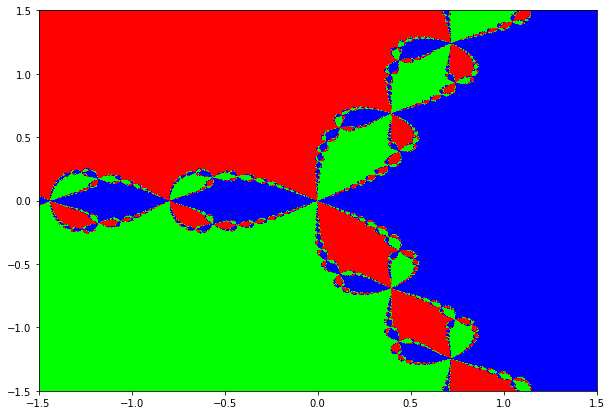

In [252]:
basis_newton(f1, df1, zeros1, bounds1, 1000, 100)

In [253]:
f2 = lambda x: x**3 - x
df2 = lambda x: 3*x**2 - 1

In [254]:
zeros2 = np.array([0, 1, -1])
bounds2 = np.array([-1.5, 1.5, -1.5, 1.5])

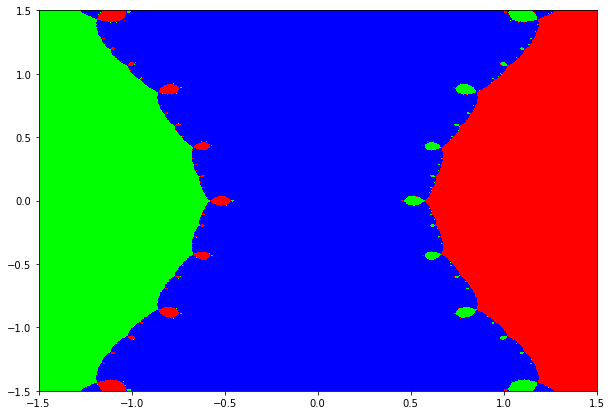

In [255]:
basis_newton(f2, df2, zeros2, bounds2, 1000, 100)